In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath
import math 
from numpy.linalg import inv
def custom_plot_single(fig, ax1, 
                       x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95],
                       show_legend=True,
                       plt_outside=False, y_logscale = False):
    
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best',shadow=True)
    if (y_logscale):
        ax1.set_yscale('log')
    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_xlabel(label[0], fontsize=25)#, fontdict=dict(weight='bold'))
    ax1.set_ylabel(label[1], fontsize=25)#, fontdict=dict(weight='bold'))
    fontsize=25
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    if(plt_outside==False):
        plt.savefig(pltname, bbox_inches = "tight")
    return plt,pltname

PrintFigures=True
PointCharge=True


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
g=1
q_e = 1.602176634e-19
acc = 0.142e-9
m=17
n=0
nano=1e-9
E_f = -1
def get_radius(acc,m,n):
    return acc*(np.sqrt(3.)/(2*np.pi))*np.sqrt(m**2 + m*n + n**2)


R_cnt = get_radius(acc,m,n)
print('Radius of CNT (nm):', R_cnt/nano)

k=8.617333262e-5 #eV/K
eps_0 = 8.8541878128e-12
gamma=2.5 #eV

Temp = 298.
Eg_min = acc*gamma/R_cnt
print('bandgap, Eg_min/(eV):', Eg_min)
kT = k*Temp

s = 0.3e-9#distance between CNT and the metal
print('s',s)
mixing_fraction = 0.1

C = (acc*np.sqrt(3)*g/(np.pi**2 *R_cnt* gamma))
N = 4./(3*np.sqrt(3)*acc**2)


print('Areal_density',N)
print('e*Areal_density',N*q_e)
print('D_CNT',2*R_cnt)

Radius of CNT (nm): 0.665453976774103
bandgap, Eg_min/(eV): 0.5334704012453583
s 3e-10
Areal_density 3.81769668180669e+19
e*Areal_density 6.116624419290011
D_CNT 1.330907953548206e-09


In [41]:
files = 1
step = 10
pts = 192
V = np.arange(-4, 8, .5)
print('Voltage on the lead: ', V[step])


Voltage on the lead:  1.0


In [42]:
Y    = np.zeros((files,pts), dtype=float)
Qin  = np.zeros((files,pts), dtype=float)
Qout = np.zeros((files,pts), dtype=float)
Norm = np.zeros((files,pts), dtype=float)
U    = np.zeros((files,pts), dtype=float)
Ev    = np.zeros((files,pts), dtype=float)

path = np.zeros(files, dtype=object)

In [43]:
path[0] = "../../Exec/parallel_5CNTs/negf/NS_1/step%04d_"%(step)

print(path[0])

../../Exec/parallel_5CNTs/negf/NS_1/step0010_


In [44]:
def read_file(path):
    print('reading path:',path)

    fileQout = open(path+"Qout.dat")
    lines = fileQout.readlines()
    lst = []
    counter=0
    for line in lines[1:]:    
        lst += [line.split()]
    y    = [x[0] for x in lst]
    qout = [x[1] for x in lst]
    y    = np.asfarray(y)
    qout = np.asfarray(qout)
    
    fileU = open(path+"U.dat")
    lines = fileU.readlines()
    lst = []
    counter=0
    for line in lines[0:]:    
        lst += [line.split()]
    y = [x[1] for x in lst]
    u = [x[2] for x in lst]
    y = np.asfarray(y)
    u = np.asfarray(u)
    
    #norm file
    fileNorm = open(path+"norm.dat")
    lines = fileNorm.readlines()
    lst = []
    counter=0
    for line in lines[1:]:    
        lst += [line.split()]

    norm = [x[1] for x in lst]
    norm = np.asfarray(norm)

    return y, qout, u, norm

In [45]:
for f in range(0,files):
    Y[f], Qout[f], U[f], Norm[f] = read_file(path[f])

reading path: ../../Exec/parallel_5CNTs/negf/NS_1/step0010_


In [51]:

Ev = -Eg_min/2. + U
Ec = Eg_min/2. + U
print(Qout)

[[0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.26140897 0.26140897
  0.26140897 0.26140897 0.26140897 0.26140897 0.

/tmp/ipykernel_416942/2488735281.py:45: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax1.set_yscale('log')


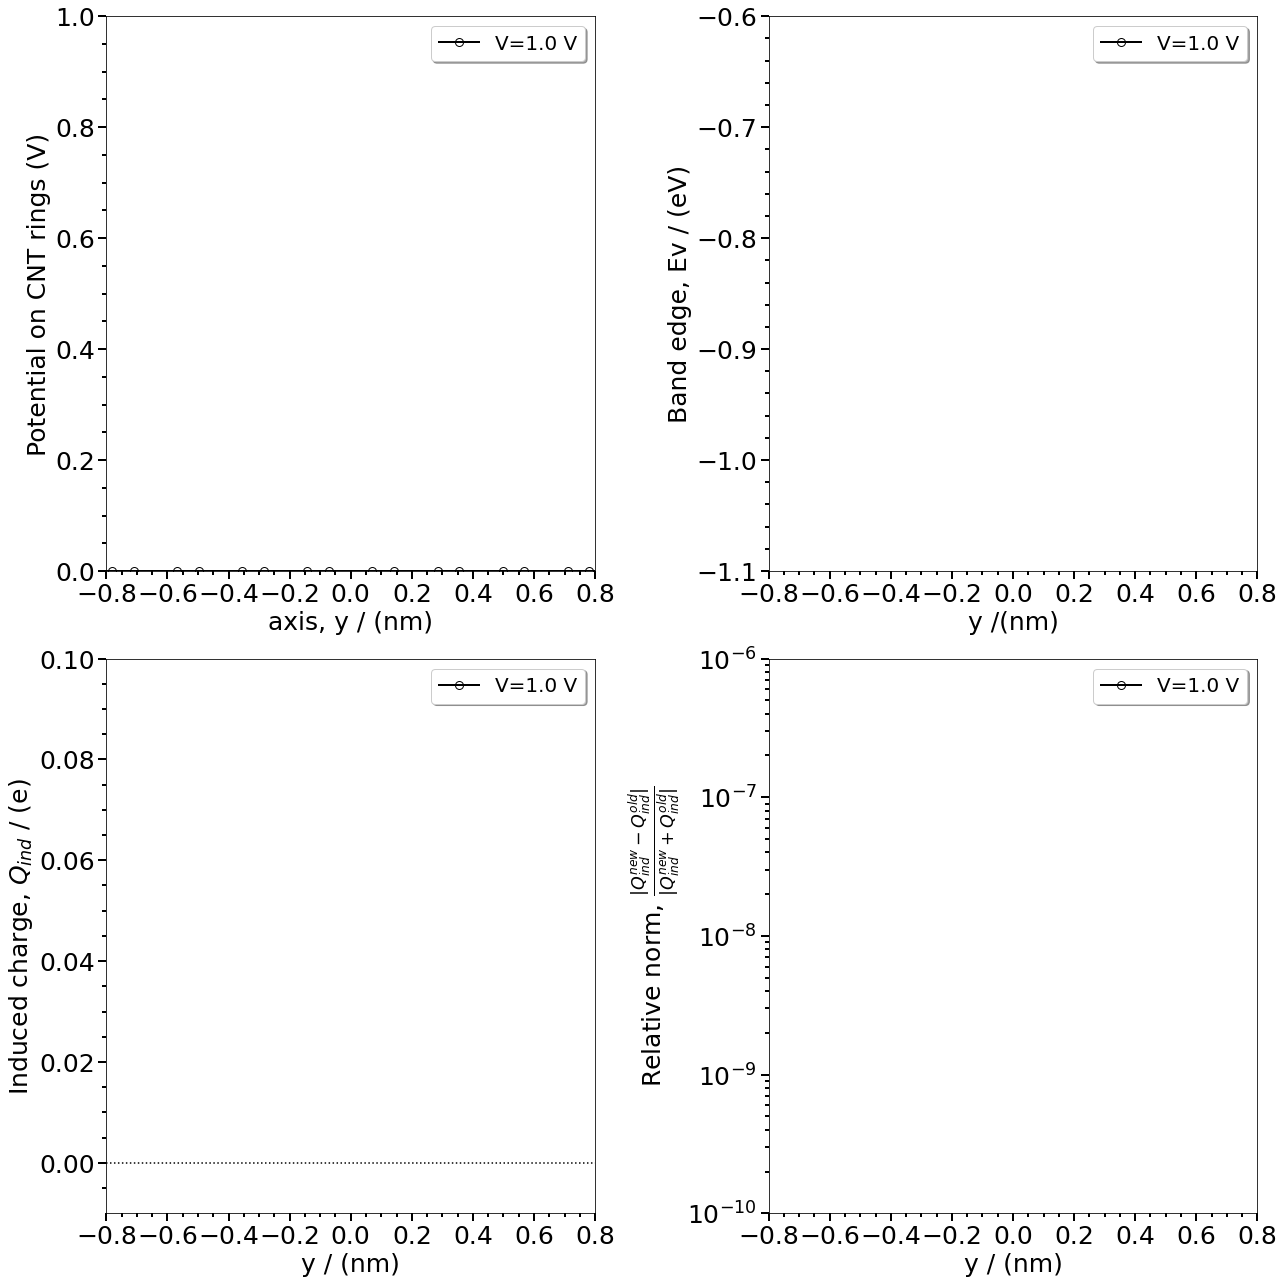

In [47]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(18,18)
#fig.suptitle(r'$V_{gs}=0.67~$V, $V_{ds}=%.3f~$V, voltage_step= %d'%(Vds, volage_step), fontsize=30)
if(PrintFigures):
    plt1,pltname = custom_plot_single(fig, ax[0][0], 
                                     [Y[0]], 
                                     [-U[0]],
                                     [r'V=%.1f V'%(V[step])],
                                     [-0.8, 0.8],
                                     [0,1],
                                     [r'axis, y / (nm)',
                                      r'Potential on CNT rings (V)'],
                                     'U.png',
                                     ['k','r','g','b','orange'],
                                     linestyle=['solid','dashed','dotted','dashed','solid','solid'],
                                     markertype=['o','^','<','>','x'],
                                     markevery=[1,1,1,1,1],
                                     linewidth=[2,3,3,2,2],
                       show_legend=True,
                       plt_outside=True, y_logscale=False)


if(PrintFigures):
    plt2,pltname = custom_plot_single(fig, ax[0][1],
                                     [Y[0]], 
                                     [Ev[0]],
                                     [r'V=%.1f V'%(V[step])],
                                     [-0.8, 0.8],
                                     [-1.1, -0.6],
                                     [r'y /(nm)',
                                      r'Band edge, Ev / (eV)'],
                                     'Ev.png',
                                     ['k','r','g','b','orange'],
                                     linestyle=['solid','dashed','dotted','dashed','solid','solid'],
                                     markertype=['o','^','<','>','x'],
                                     markevery=[1,1,1,1,1],
                                     linewidth=[2,3,3,2,2],
                       show_legend=True,
                       plt_outside=True, y_logscale=False)


if(PrintFigures):
    plt3,pltname = custom_plot_single(fig, ax[1][0],
                                     [Y[0]], 
                                     [Qout[0]],
                                     [r'V=%.1f V'%(V[step])],
                                     [-0.8, 0.8],
                                     [-0.01,0.1],
                                     [r'y / (nm)',
                                      r'Induced charge, $Q_{ind}$ / (e)'],
                                     'Q.png',
                                     ['k','r','g','b','orange'],
                                     linestyle=['solid','dashed','dotted','dotted','solid','solid'],
                                     markertype=['o','^','<','>','x'],
                                     markevery=[1,1,1,1,1],
                                     linewidth=[2,3,3,2,2],
                       show_legend=True,
                       plt_outside=True, y_logscale=False)
ax[1][0].axhline(y = 0, color = 'k', linestyle = 'dotted')

if(PrintFigures):
    plt4,pltname = custom_plot_single(fig, ax[1][1],
                                     [Y[0]], 
                                     [Norm[0]],
                                     [r'V=%.1f V'%(V[step])],
                                     [-0.8, 0.8],
                                     [1e-10,1e-6],
                                     [r'y / (nm)',
                                      r'Relative norm, $\frac{|Q_{ind}^{new} - Q_{ind}^{old}|}{|Q_{ind}^{new} + Q_{ind}^{old}|}$'],
                                     'Norm.png',
                                     ['k','r','g','b','orange'],
                                     linestyle=['solid','dashed','dotted','dashed','solid','solid'],
                                     markertype=['o','^','<','>','x'],
                                     markevery=[1,1,1,1,1],
                                     linewidth=[2,3,3,2,2],
                       show_legend=True,
                       plt_outside=True, y_logscale=True)
    
fig.tight_layout()
plt.savefig("All_around_metal", bbox_inches = "tight")
